# **IEOR 4404  Simulation (Fall 2020)**

**Homework 2  [Total points: 80 Points]**


**Due 11:59 PM, Oct 18**

Homework 2 consists of application-oriented exercises mostly focusing on different sampling techniques for sampling from a discrete distribution.

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [ ]:
#Your Name: Ziyang Zhang
#Your UNI: zz2732

In [ ]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np

import scipy.special as spsp

import matplotlib.pyplot as plt

%matplotlib inline

import sympy

import scipy.stats as spst



# Exercise 1 [70 points]

In HW1, we studied Negative Binomial distribution, which is a discrete probability distribution that models the number of successes (Our outcome variable: $k$) in a sequence of independent and identically distributed Bernoulli trials (with the probability of success=$p$) before a specified (non-random) number of failures (denoted $r$) occurs (Source: Wikipedia [Negative Binomial Distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution)). 

The probability mass function follows

$P(k)=\frac{(k+r-1)!}{k!(r-1)!}p^k(1-p)^r$ where $k=0, 1, 2, ..., \infty$

* In Q1-Q4, we want to will use this distribution as our proposal distribution to perform rejection sampling to get samples from a Poisson distribution.
* In Q5 and Q6, we will be studying the composition method based on this distribution.


## Q1. [15 points]

Let's first propose a different way to sample from a Negative Binomial distribution. Based on the definition of Negative Binomial distribution, this distribution is nothing but the sum of $r$ variables that all follow a Geometric distribution. For this Geometric distribution, it is defined as the number of successes needed **before** getting the first failure, when the probability of success in each Bernoulli trial is $p$. [notice that it is defined slightly different from the Geometric distributions we have seen so far]

Since a Geometric distribution can be generated using the direct conversion method, we can use the following steps as an alternative method to generate $N$ samples from a Negative Binomial distribution.

* Derive the direct conversion rule for the Geometric distribution.
* Generate $r$ arrays of random samples from a Geometric distribution. Each array should contain $N$ random samples.
* Summing up these $r$ arrays to get an array of $N$ elements. Each element is a random sample from the Negative Binomial distribution.

For this question
* Use `sympy.Sum()` to derive the CDF of the geometric distribution from the PMF. 
* Use `sympy.solve()` to help you derive the direct conversion formula based on the CDF.
* Based on the formula and follow the steps listed above, generate 10000 random  samples from a Negative Binomial distribution with $r=3$ and $p=0.9$.
* Plot both the sample distribution of these 10000 samples (using scatter plot) and the corresponding theoretical distribution (using bar chart) in the same graph.



In [ ]:
sympy.init_printing()
x=sympy.Symbol("x")
p=sympy.Symbol("p")
u=sympy.Symbol("u")
pmf=p**x*(1-p)
cdf=sympy.Sum(pmf,(x,0,x)).doit().simplify()

In [ ]:
pmf

In [ ]:
cdf

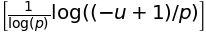

In [ ]:
#solve u<CDF(x)   #solve for x, for cdf-u=0
S1=sympy.solve(cdf-u,x)
S1

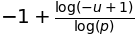

In [ ]:
#the logarithm of the ratio of two numbers is the difference of the logarithms
#rewrite S1
S1=(sympy.log(-u+1)-sympy.log(p))/sympy.log(p)
S1.simplify()

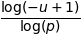

In [ ]:
#solve CDF(x)<=u
S2=sympy.solve(cdf.subs({x:x-1})-u,x)
S2=S2[0].collect(u)
S2

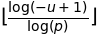

In [ ]:
#derive the Direction Formula for this geometric distribution
x=sympy.floor(S2)
x

In [ ]:
#generate 10000 samples using the direct conversion formula above
N=10000
r=3
p=0.9
samples=np.zeros((N),dtype=int)
for i in range(r):
  u=np.random.rand(N)
  samples+=np.floor(np.log(1-u)/np.log(p)).astype(int)
samples

array([31, 41, 50, ..., 40,  9, 41])

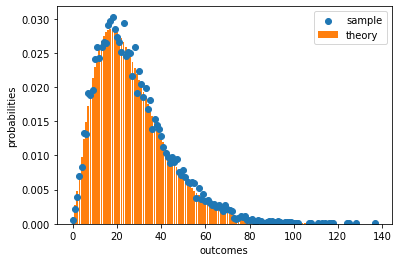

In [ ]:
#visualization
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
pmf=spsp.comb(x+r-1, x)*(p**x)*((1-p)**r)
plt.bar(x,pmf,label="theory")
plt.legend(loc="best")
plt.xlabel("outcomes")
plt.ylabel("probabilities")
plt.show()

##Q2. [15 points]

Let's use a Negative Binomial Distribution as a proposal distribution to generate samples from a Poisson distribution with $\lambda=40$. 

Since we want two distributions to follow similar shapes, let's select a negative binomial distribution with the mean values equals to 40 as well. Remember, the expected value of a negative binomial distribution is equal to $\frac{rp}{1-p}$.

* Let's assume we want to use $r=2$ for the proposal distribution.  With the help of `sympy.solve()` function, solve $p$ so that two distributions have the same mean. We will use the $r$ and $p$ value for all subparts in Q2. 
* Visualize the target distribution for $x$ between 0 and 100 using a bar chart. In the same graph, visualize the proposal distribution for the same $x$ range using a scatter plot. Make sure to add a legend to label each plot. 
* Visualize the ratio between $PMF_{target}(x)$ and $PMF_{proposal}(x)$ for $x$ between $0$ and $100$ using a bar chart.
* Find out the $c$ value for rejection sampling.
* Construct a function (or functions) that helps to generate **one** sample from the target distribution using rejection sampling. [your algorithm should allow you to generate sample values above 100 as well]
* Generate 10000 random samples from the target distribution.
* Plot both the sample distribution of these 10000 samples (using scatter plot) and the corresponding theoretical distribution (using bar chart) in the same graph.



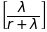

In [ ]:
#derive p
r_s=sympy.Symbol("r")
p_s=sympy.Symbol("p")
lm_s=sympy.Symbol("λ")

sympy.solve((r_s*p_s)/(1-p_s)-lm_s,p_s)

In [ ]:
r_2=2
lm=40
p_2=lm/(r_2+lm)
p_2

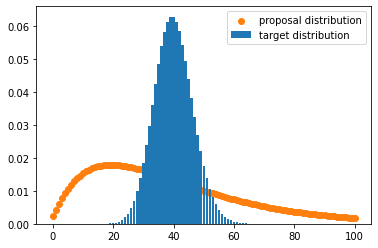

In [ ]:
#plot the target and proposal distribution
x_2=np.arange(101)
PMF_t=spst.poisson.pmf(x_2,lm)
PMF_p=spsp.comb(x_2+r_2-1, x_2)*(p_2**x_2)*((1-p_2)**r_2)
plt.bar(x_2,PMF_t,label="target distribution")
plt.scatter(x_2,PMF_p,label="proposal distribution")
plt.legend()
plt.show()

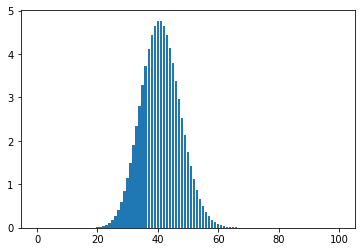

In [ ]:
#plot the ratio between two distributions
plt.bar(x_2,PMF_t/PMF_p)
plt.show()

In [ ]:
#find out the c value
c=np.max(PMF_t/PMF_p)
c

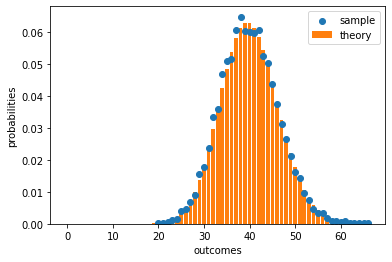

In [ ]:
#sampling and visualization
def pmf_p(k):
    return spsp.comb(k+r_2-1, k)*(p_2**k)*((1-p_2)**r_2)
def pmf_t(k):
    return spst.poisson.pmf(k,lm)
def rejection():
    proposal=np.floor(np.log(1-np.random.rand())/np.log(p_2)).astype(int) + np.floor(np.log(1-np.random.rand())/np.log(p_2)).astype(int)
    while np.random.rand()>pmf_t(proposal)/pmf_p(proposal)/c:
        proposal=np.floor(np.log(1-np.random.rand())/np.log(p_2)).astype(int) + np.floor(np.log(1-np.random.rand())/np.log(p_2)).astype(int)
    return proposal

samples=np.array([rejection() for i in range(10000)])
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
pmf=spst.poisson.pmf(x,lm)
plt.bar(x,pmf,label="theory")
plt.legend(loc="best")
plt.xlabel("outcomes")
plt.ylabel("probabilities")
plt.show()

##Q3. [8 points]

* Rewrite your algorithm in Q2 to generate 10000 samples in a parallel way. Use the same $r$, $p$, and $\lambda$ value you used in Q2.   [No loops allowed]

* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

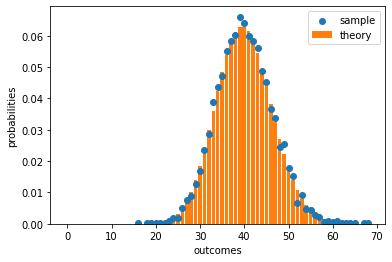

In [ ]:
#parallel sampling
def pmf_p(k):
    return spsp.comb(k+r_2-1, k)*(p_2**k)*((1-p_2)**r_2)
def pmf_t(k):
    return spst.poisson.pmf(k,lm)
def parallel_rejection(N):
    N_p=int(N*c+4*(N*c*(c-1))**0.5)
    
    proposal=np.floor(np.log(1-np.random.rand(N_p))/np.log(p_2)).astype(int) + np.floor(np.log(1-np.random.rand(N_p))/np.log(p_2)).astype(int)
    AR=pmf_t(proposal)/pmf_p(proposal)/c
    proposal=proposal[np.random.rand(N_p)<AR]
    
    return proposal[:N]

samples=parallel_rejection(10000)

#visualization
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
pmf=spst.poisson.pmf(x,lm)
plt.bar(x,pmf,label="theory")
plt.legend(loc="best")
plt.xlabel("outcomes")
plt.ylabel("probabilities")
plt.show()

##Q4. [7 points]

Let's evaluate the efficiency of our algorithm:

* when using $r=2$ and generating the samples one by one, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 
* When using $r=2$ and generating the samples in parallel based on the formula provided in the lecture, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? [Since the probability of having a final sample size less than 10000 is extremely small, you can assume you always get at least 10000 samples]
* If we change the value of $r$ to 3 and use the same method to get $p$, how does the value of $c$ change? If we generate samples on by one, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 
* If we change the value of $r$ to 40 and use the same method to get $p$, how does the value of $c$ change? If we generate samples on by one, how many  samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 


In [ ]:
# When r=2, c=4.766526417772085, on average, we need 10000*c proposals from Negative Binomial Distribution.
# For each proposal from Negative Binomial Distribution, we need to generate 2 samples from a Geometric Distribution
# Therefore, on average, we need 10000*c*2 samples from a Geometric Distribution to generate 10000 samples one by one from our target distribution


10000*c*2

In [ ]:
# When r=2, c=4.766526417772085, on average, we need (10000*c+4*(10000*c*(c-1))**0.5) proposals from Negative Binomial Distribution.
# For each proposal from Negative Binomial Distribution, we need to generate 2 samples from a Geometric Distribution
# Therefore, on average, we need (10000*c+4*(10000*c*(c-1))**0.5)*2 samples from a Geometric Distribution to generate 10000 samples in parallel from our target distribution

(10000*c+4*(10000*c*(c-1))**0.5)*r_2

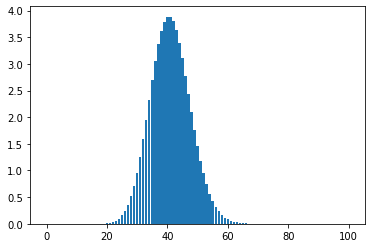

In [ ]:
# change r to 3
r_4_3 = 3
p_4_3 = lm/(r_4_3+lm)
x_4_3=np.arange(101)
PMF_t_4_3=spst.poisson.pmf(x_4_3,lm)
PMF_p_4_3=spsp.comb(x_4_3+r_4_3-1, x_4_3)*(p_4_3**x_4_3)*((1-p_4_3)**r_4_3)
plt.bar(x_4_3,PMF_t_4_3/PMF_p_4_3)
plt.show()

In [ ]:
#find out the NEW c value
c_4_3=np.max(PMF_t_4_3/PMF_p_4_3)
c_4_3

In [ ]:
# When r=3, c=3.8846538845065135, on average, we need 10000*c proposals from Negative Binomial Distribution.
# For each proposal from Negative Binomial Distribution, we need to generate 3 samples from a Geometric Distribution
# Therefore, on average, we need 10000*c*3 samples from a Geometric Distribution to generate 10000 samples one by one from our target distribution


10000*c_4_3*3

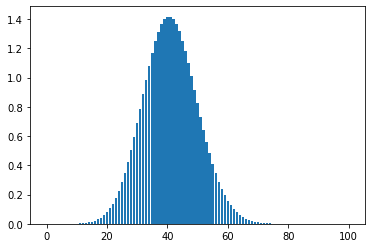

In [ ]:
# change r to 40
r_4_40 = 40
p_4_40 = lm/(r_4_40+lm)
x_4_40=np.arange(101)
PMF_t_4_40=spst.poisson.pmf(x_4_40,lm)
PMF_p_4_40=spsp.comb(x_4_40+r_4_40-1, x_4_40)*(p_4_40**x_4_40)*((1-p_4_40)**r_4_40)
plt.bar(x_4_40,PMF_t_4_40/PMF_p_4_40)
plt.show()

In [ ]:
#find out the NEW c value
c_4_40=np.max(PMF_t_4_40/PMF_p_4_40)
c_4_40

In [ ]:
# When r=40, c=1.4156874152734606, on average, we need 10000*c proposals from Negative Binomial Distribution.
# For each proposal from Negative Binomial Distribution, we need to generate 40 samples from a Geometric Distribution
# Therefore, on average, we need 10000*c*40 samples from a Geometric Distribution to generate 10000 samples one by one from our target distribution


10000*c_4_40*40

##Q5. [15 points]

Let's work on an extension of the Pokemon Go example we saw in HW1. Let's assume that a random player can only belong to one of the three following segments:

* Segment 1: Players will keep on playing until they see 1 shiny pokemon
* Segment 2: Players will keep on playing until they see 2 shiny pokemon
* Segment 3: Players will only check up to 30 pokemon. However, if they get one shiny pokemon during the process, they will stop.


Let's assume that a player has a 0.25 probability of belonging to segment 1 and a 0.1 probability of belonging to segment 2. 

Again, let's assume the probability of encountering a shiny pokemon is 0.1. 

We are interested in getting 10000 samples of $x$, where $x$ is a variable that represents the number of non-shiny pokemon encountered before a random player stops.

* Construct a function that will generate one sample of $x$ based on the composition method.
* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

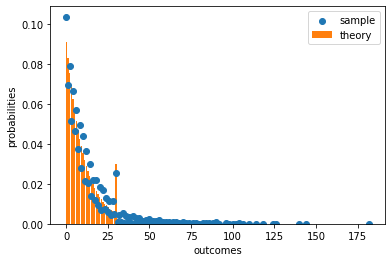

In [ ]:
#Composition Method
p=0.9
#sampling one by one
def composition():
    if np.random.rand()<0.25:
        u=np.random.rand()
        #r=1
        x=np.floor(np.log(1-u)/np.log(p)).astype(int)
        return x
    elif np.random.rand()<0.35:
        u=np.random.rand()
        #r=2
        x=np.floor(np.log(1-u)/np.log(p)).astype(int)+np.floor(np.log(1-u)/np.log(p)).astype(int)
        return x
    else:
        u=np.random.rand()
        x=np.floor(np.log(1-u)/np.log(p)).astype(int)
        if x<=30:
          return x
        else:
          return 30

samples=np.array([composition() for i in range(10000)])

#visualization
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
pmf_1=spsp.comb(x+1-1, x)*(p**x)*((1-p)**1)
pmf_2=spsp.comb(x+2-1, x)*(p**x)*((1-p)**2)
pmf_3=np.empty(len(x))
seg1=x<30
pmf_3[seg1]=spsp.comb(x[x<30]+1-1, x[x<30])*(p**x[x<30])*((1-p)**1)
pmf_3[30]=1-np.sum(pmf_3[seg1])
pmf_3[31:]=0
pmf=pmf_1*0.25+pmf_2*0.1+pmf_3*0.65
plt.bar(x,pmf,label="theory")
plt.legend(loc="best")
plt.xlabel("outcomes")
plt.ylabel("probabilities")
plt.show()

##Q6. [10 points]

* Rewrite your algorithm in Q5 to generate 10000 samples in a parallel way. [No loops allowed]

* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

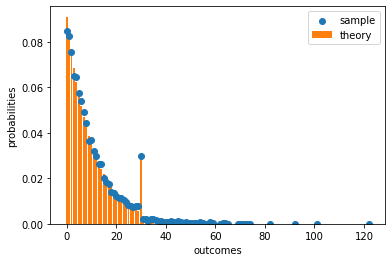

In [ ]:
#sampling in parallel
p=0.9
u=np.random.rand(10000)
sample_1=np.floor(np.log(1-np.random.rand(10000))/np.log(p)).astype(int)  *  (u<0.25)
sample_2=(np.floor(np.log(1-np.random.rand(10000))/np.log(p)).astype(int)+np.floor(np.log(1-np.random.rand(10000))/np.log(p)).astype(int))  *  ((u>=0.25)*(u<0.35))
sample_3=np.floor(np.log(1-np.random.rand(10000))/np.log(p)).astype(int)  *  ((u>=0.35)*(u<1))
seg1=sample_3>30
sample_3[seg1]=30
samples=sample_1+sample_2+sample_3

#visualization
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
pmf_1=spsp.comb(x+1-1, x)*(p**x)*((1-p)**1)
pmf_2=spsp.comb(x+2-1, x)*(p**x)*((1-p)**2)
pmf_3=np.empty(len(x))
seg1=x<30
pmf_3[seg1]=spsp.comb(x[x<30]+1-1, x[x<30])*(p**x[x<30])*((1-p)**1)
pmf_3[30]=1-np.sum(pmf_3[seg1])
pmf_3[31:]=0
pmf=pmf_1*0.25+pmf_2*0.1+pmf_3*0.65
plt.bar(x,pmf,label="theory")
plt.legend(loc="best")
plt.xlabel("outcomes")
plt.ylabel("probabilities")
plt.show()

#Exercise 2 [10 points]



##Q1. [3 points]

* Use np.random.rand() to generate 10000 samples and  visualize the distribution of the samples.
* In the same plot, plot the corresponding target theoretical distribution.


In [ ]:
#10000 samples from standard Uniform Distribution
samples=np.array([np.random.rand() for i in range(10000)])
samples

array([0.76986826, 0.47782925, 0.09376854, ..., 0.69191527, 0.85759527,
       0.77978388])

In [ ]:
#compute the PDF of standard Uniform Distribution
a=0
b=1
x=np.linspace(a-1,b+1,1000)
pdf=np.repeat(0.0, 1000)
pdf[(x>=a) * (x<=b)]=1/(b-a)

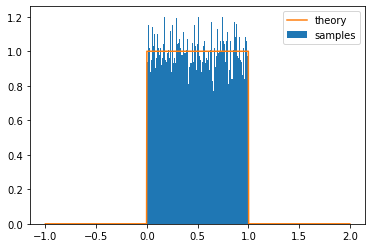

In [ ]:
#visualization
plt.hist(samples,density=True,bins=int(10000**0.5),label='samples')
plt.plot(x,pdf,label='theory')
plt.legend(loc="best")
plt.show()

## Q2. [7 points]

* Based on the 10000 samples, we can get a sample mean. Repeat the process 1000 times to get 1000 sample means.
* Plot the sample distribution of these 1000 sample means.
* Based on the central limit theorem, plot the theoretical distribution of the sample mean in the same plot.

In [ ]:
#generate 1000 sample means
sample_mean=np.array([np.mean(np.random.rand(10000)) for i in range(1000)])



Calling "np.random.rand()" generates a sample from a Uniform Distribution with $a=0$ and $b=1$. The mean of this Uniform Distribution is $\frac{(a+b)}{2} = 1/2$ and the variance is $\frac{(b-a)^2}{12} = 1/12$

According to the central limit theorem, when $N$ is large, such as $N = 10000$ here, the sample mean of the 10000 samples from Uniform Distribution with $a=0$ and $b=1$ above follows a Normal Distribution with mean of $\frac{1}{2}$  and variance of $\frac{\frac{1}{12}}{N} = \frac{\frac{1}{12}}{10000}$.



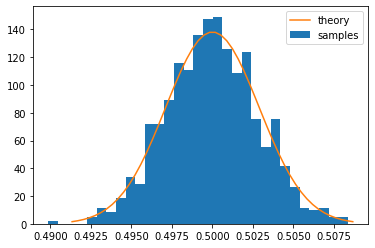

In [ ]:
#visualization of the distribution of sample means
plt.hist(sample_mean,density=True,bins=int(1000**0.5),label='samples')
mu,sigma=(1/2),((1/12)/10000)**0.5
x=np.linspace(mu-3*sigma,mu+3*sigma)
pdf=1/(2*np.pi*sigma**2)**0.5*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x,pdf,label='theory')
plt.legend(loc='best')
plt.show()